In [1]:
import warnings
import wordcloud
import json
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import re
from wordcloud import WordCloud
import jieba
import xgboost as xgb

In [55]:
with open(r"D:/gyt的D盘文件夹/暑假项目二/stoplist.txt",'r',encoding='utf-8') as f:
    stoplist = f.read()
stoplist = stoplist.split()+['\n','',' ',',','\n']
data_new = df22['cut'].iloc[0:100].apply(lambda x:[i for i in x if i not in stoplist])
df22['cut'].iloc[0:100]

0                  [职位, 描述,  , Android, 平台, 手机软件, 设计, 开发, 需求, 分析,  , 任职,  , 熟练掌握, java, 技术, 熟悉, 面向对象编程, 设计, 具备, 扎实, 编程, 基础,  , 精通, Android, 开发, 平台, 框架, 原理, 面向对象, 开发, 理解,  , 具备, 熟练, 技术, 调研, 能力, 可行性,  , 两年, Android, 端, 互联网, 开发, 经验,  , 熟练, 即时通讯, 开发, 消息, 推送, 开发, 经验,  , 具备, 团队, 合作, 能力, 沟通, 能力, 强, 自我, 提升, 学习, 能力,  , 优先, 录用, 条件,  , 研究, 阅读,  , Android,  , 系统, 源码,  , 支付, 网上银行, 消息, 推送, 即时通讯, 相关, 软件开发, 经验,  , 熟悉, NDK, 编程, 相关, 经验]
1     [ , 岗位, 描述, 前端, 框架, 设计,  ,  , 业务, 模块, 前端, 代码, 开发,  ,  , 平台, 易用性, 用户, 体验, 持续, 改进,  ,  , Web, 前沿技术, 研究, 新, 技术, 调研,  , 岗位,  , 精通, Web, 前端, 技术,  , 包括, HTML, CSS, Javascript,  ,  , 精通, JS, 对象, 编程,  , 熟练, jquery, 动态, 网页, 开发,  ,  , Ajax, Jsonp, 开发, 经验,  ,  ,  , NodeJS,  ,  , Html5,  , 相关, 技术, 熟悉, HTTP, 协议, Apache, 模块, cookie, Web, 技术,  ,  , 技术, 视野, 广阔,  , 乐于, 学习, 新, 知识, 新, 技术,  , 工作, 中,  ,  , 个性, 乐观, 开朗,  , 逻辑性, 强, ...]
2                               [\n,  , 岗位职责,  , \n,  , 负责, 日常, 款项, 支付, 境内外, 网银, 转帐, 汇款, 日常, 往来账, 核对,  , \n,  , 负责, 公司, 分公司, 费用, 报销, 核查, 支付,  , \n,  , 负责,

In [30]:
for i in tqdm(range(len(df22['Job_Description']))):
    words=jieba.lcut(df22['Job_Description'][i])
    df22['cut'][i]=[w for w in words if w not in list(tmpdf.w)]
mywordList=[]
for i in df22.cut:
    mywordList.append(i)
wordList=[x for item in mywordList for x in item]
wordList=[w for w in wordList if w not in [' ','\n']]#再去一下
comment=' '.join(wordList)

100%|███████████████████████████████████████████████████████████████████████| 402627/402627 [10:40:59<00:00, 10.47it/s]


In [31]:
df22.to_csv('D:\gyt的D盘文件夹\建模课设\大大大分词结果.csv')

# 分词

In [2]:
df=pd.read_csv('D:\gyt的D盘文件夹\建模课设\大大大分词结果.csv')
df=df[['PositionId','cut']]

In [3]:
df=df.sample(frac=0.1,random_state=2021)
df=df.reset_index(drop=True)

In [4]:
df['词']=0

In [5]:
from tqdm import tqdm
str_pat = re.compile(r'\'(.*?)\'')
for i in tqdm(range(len(df.cut))):
    text=df.cut[i]
    df['词'][i]=str_pat.findall(text)  

100%|██████████████████████████████████████████████████████████████████████████| 40263/40263 [00:09<00:00, 4202.04it/s]


In [6]:
m_stoplist=[' ','\n','\\n','日常','熟悉','新','nan','强大','年','工作','相关','能力','优先','负责','团队','公司','平台','年','项目','强','具备','行业','提供','以上学历','岗位职责','任职','中','职位','参与','至少','较强','一种','建立','支持','岗位']#再去一下
m_stoplist=set(m_stoplist)

In [7]:
df=df[~(df['cut']=="['nan']")]
df.reset_index(drop=True,inplace=True)

In [8]:
df['词fenfen']=0

In [9]:
for i in tqdm(range(len(df.cut))):
    wordList=[w for w in df['词'][i] if w not in m_stoplist]
    comment=' '.join(wordList)
    df['词fenfen'][i]=comment

100%|██████████████████████████████████████████████████████████████████████████| 36560/36560 [00:07<00:00, 4636.20it/s]


In [3]:
# df.to_csv('D:\gyt的D盘文件夹\建模课设\结果结果.csv')
# df=pd.read_csv('D:\gyt的D盘文件夹\建模课设\结果结果.csv')

In [4]:
df=df[['PositionId','词5']]
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True,inplace=True)

In [38]:
wordList=[w for w in df['词'][1] if w not in m_stoplist]
wordList

['描述',
 '前端',
 '框架',
 '设计',
 '业务',
 '模块',
 '前端',
 '代码',
 '开发',
 '易用性',
 '用户',
 '体验',
 '持续',
 '改进',
 'Web',
 '前沿技术',
 '研究',
 '新',
 '技术',
 '调研',
 '精通',
 'Web',
 '前端',
 '技术',
 '包括',
 'HTML',
 'CSS',
 'Javascript',
 '精通',
 'JS',
 '对象',
 '编程',
 '熟练',
 'jquery',
 '动态',
 '网页',
 '开发',
 'Ajax',
 'Jsonp',
 '开发',
 '经验',
 'NodeJS',
 'Html5',
 '技术',
 'HTTP',
 '协议',
 'Apache',
 '模块',
 'cookie',
 'Web',
 '技术',
 '技术',
 '视野',
 '广阔',
 '乐于',
 '学习',
 '新',
 '知识',
 '新',
 '技术',
 '个性',
 '乐观',
 '开朗',
 '逻辑性',
 '乐于',
 '合作',
 'Web',
 '前沿技术',
 '研究',
 '新',
 '技术',
 '调研']

In [10]:
df=df[['PositionId','词fenfen']]
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True,inplace=True)

## 提取关键词

In [ ]:
document = [" ".join(sent0) for sent0 in sent_words]

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
# tfidf_matrix = tf.fit_transform(df1['genres'])
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['词fenfen']) # 向量化剧情简介文本
# print(tfidf_matrix.shape)                     #(100, 563)，100个电影记录，每个电影后边有563个词
 
terms = tfidf_vectorizer.get_feature_names()  #terms” 这个变量只是 tf-idf 矩阵中的特征（features）表，也是一个词汇表
zdf=tfidf_matrix.toarray()

In [47]:
zdf.shape

(36560, 1000)

In [23]:
from sklearn import metrics
def score_X(zdf,pre):
    score_ca=metrics.calinski_harabasz_score(zdf,pre)
    score_si=metrics.silhouette_score(zdf,pre)
    return score_si,score_ca

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist  # 计算距离时
import matplotlib.pyplot as plt
# from matplotlib.font_manager import FontProperties
# 正常显示中文字体
# font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size=10) 
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False

# K = range(2, 10)
# meandistortions_km = []
# score_km=[]

# for k in K:
#     print('-----------'+str(k)+'------------')
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(zdf)
#     meandistortions_km.append(sum(np.min(cdist(zdf, kmeans.cluster_centers_, 'euclidean'), axis=1)) / zdf.shape[0])
#     s1,s2,s3=score_X(zdf,kmeans.fit_predict(zdf))
#     score_km.append({'k':k,'s1':s1,'s2':s2,'s3':s3})
# df_score_km = pd.DataFrame(score_km)

In [23]:
import numpy as np
from sklearn.decomposition import PCA
# X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=1)
pca.fit(zdf.astype('float32'))

print(pca.explained_variance_ratio_)


[0.01942879]


In [41]:
zdf=zdf.astype('float16')

In [23]:
#迷你km
from sklearn import cluster
K = range(2, 10)
meandistortions_mnkm = []
score_mnkm=[]

for k in K:
    print('-----------'+str(k)+'------------')
    mnkmeans = cluster.MiniBatchKMeans(n_clusters=k,batch_size=100)
    mnkmeans.fit(zdf)
    meandistortions_mnkm.append(sum(np.min(cdist(zdf, mnkmeans.cluster_centers_, 'euclidean'), axis=1)) / zdf.shape[0])
#     s1,s2=score_X(zdf,mnkmeans.fit_predict(zdf))
#     score_mnkm.append({'k':k,'s1':s1,'s2':s2})

# df_score_mnkm = pd.DataFrame(score_mnkm)

-----------2------------
-----------3------------
-----------4------------
-----------5------------
-----------6------------
-----------7------------
-----------8------------
-----------9------------


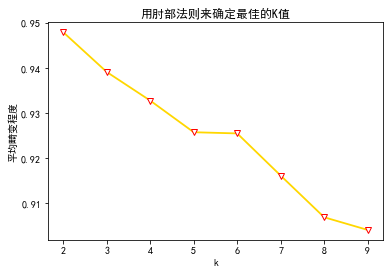

In [24]:
# df_score_km = pd.DataFrame(score_km)
plt.plot(K, meandistortions_mnkm,marker='v',color='gold', mec='r', mfc='w',linewidth=1.8)
plt.xlabel('k')
plt.ylabel(u'平均畸变程度')
plt.title(u'用肘部法则来确定最佳的K值')
plt.savefig('D:\gyt的D盘文件夹\建模课设\mn聚类图4.png',dpi=600)

In [48]:
from sklearn import cluster
mnkmeans = cluster.MiniBatchKMeans(n_clusters=8,batch_size=100)
mnkmeans.fit(zdf)

MiniBatchKMeans()

In [49]:
mnkmeans.cluster_centers_

array([[0.01152222, 0.00668151, 0.00308798, ..., 0.00291317, 0.00198826,
        0.00127202],
       [0.00195225, 0.0083836 , 0.00407493, ..., 0.00356201, 0.00044531,
        0.00648839],
       [0.00073047, 0.00680034, 0.002222  , ..., 0.00173216, 0.        ,
        0.00216373],
       ...,
       [0.00179891, 0.00252337, 0.00098834, ..., 0.00176053, 0.00036453,
        0.00748426],
       [0.00253664, 0.00952998, 0.00336711, ..., 0.00280843, 0.        ,
        0.00032673],
       [0.00361095, 0.00447147, 0.00288128, ..., 0.00317521, 0.0002641 ,
        0.00901392]])

In [17]:
df['类别']=mnkmeans.labels_

In [14]:
df2=pd.read_csv('D:/gyt的D盘文件夹/建模课设/C题：附件/附件1：招聘信息.csv', encoding = 'gb18030') 

In [15]:
df2 = df2.drop_duplicates('PositionId').reset_index(drop=True)


In [18]:
df3=pd.merge(df,df2,on='PositionId',how='left')[['PositionId','类别','IndustryField','PositionType']]
# df3

In [27]:
gb=df3.groupby('类别')

In [54]:
from tqdm import tqdm
df3[2]
str_pat = re.compile(r'(.*?)k')
str_1=re.compile(r'-(.*?)k')
for i in tqdm(range(len(df3.Salary.head(20)))):
    text=df3.Salary[i]
    (int(str_pat.findall(text)[0])+int(str_1.findall(text)[0]))/2

100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 20058.84it/s]


In [19]:
def distance(pos_id,cluster_center,zdf):
    chucun = []
    for row in range(cluster_center.shape[0]):
        print(10*"-",row,'-'*10)
        cut_center = zdf - cluster_center[row,:].reshape(1,1000)
        cut_center_sq = np.square(cut_center)
        every_dis = pd.Series(np.sqrt(np.sum(cut_center_sq,axis=1)))
#         print(every_dis)
#         print(every_dis.sort_values())
        value1 = every_dis.sort_values().head(5)
        print(value1)
        Index = value1.index
        ID = pos_id[Index]
        print(pos_id)
        chucun.append(list(ID))
    return chucun

In [20]:
chuc = distance(df3['PositionId'],mnkmeans.cluster_centers_,zdf)

---------- 0 ----------
31033    0.375404
33310    0.375404
15019    0.375404
34228    0.375404
3540     0.375404
dtype: float64
0        163622
1        195909
2        157579
3        186758
4        343151
          ...  
36555    395115
36556    137163
36557      8237
36558    120101
36559    325121
Name: PositionId, Length: 36560, dtype: int64
---------- 1 ----------
33310    0.292949
2130     0.292949
1835     0.292949
21953    0.292949
27654    0.292949
dtype: float64
0        163622
1        195909
2        157579
3        186758
4        343151
          ...  
36555    395115
36556    137163
36557      8237
36558    120101
36559    325121
Name: PositionId, Length: 36560, dtype: int64
---------- 2 ----------
27654    0.369295
2130     0.369295
31033    0.369295
1835     0.369295
15019    0.369295
dtype: float64
0        163622
1        195909
2        157579
3        186758
4        343151
          ...  
36555    395115
36556    137163
36557      8237
36558    120101
36559    

In [21]:
chuc

[[109736, 376834, 266792, 264504, 32170],
 [376834, 266245, 370793, 360191, 218961],
 [218961, 266245, 109736, 370793, 266792],
 [32170, 264504, 266245, 360191, 109736]]

In [33]:
df3['PositionId'][25138]
[i for i in chuc[0],chuc[1],chuc[2],chuc[3]]

[[109736, 376834, 266792, 264504, 32170],
 [376834, 266245, 370793, 360191, 218961],
 [218961, 266245, 109736, 370793, 266792],
 [32170, 264504, 266245, 360191, 109736]]

In [35]:
df3[df3['PositionId'].isin(chuc[0])|df3['PositionId'].isin(chuc[1])|df3['PositionId'].isin(chuc[2])|df3['PositionId'].isin(chuc[3])]

,PositionId,类别,IndustryField,PositionType
1835,370793,1,数据服务 · 招聘,后端开发
2130,266245,1,企业服务,后端开发
3540,32170,1,电子商务 · O2O,后端开发
15019,266792,1,电子商务,编辑
21953,360191,1,医疗健康 · 数据服务,后端开发
27654,218961,1,移动互联网,移动开发
31033,109736,1,移动互联网 · O2O,行政
33310,376834,1,移动互联网 · 招聘,移动开发
34228,264504,1,教育,视觉设计


In [45]:
df3[df3['PositionId'].isin(chuc[1])][['PositionType']].value_counts()

In [44]:
df3[df3['PositionId'].isin(chuc[0])][['PositionType']].value_counts()

In [43]:
df3[df3['PositionId'].isin(chuc[2])][['PositionType']].value_counts()

In [42]:
df3[df3['PositionId'].isin(chuc[3])][['PositionType']].value_counts()